<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/AI_final_assignment/AI_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


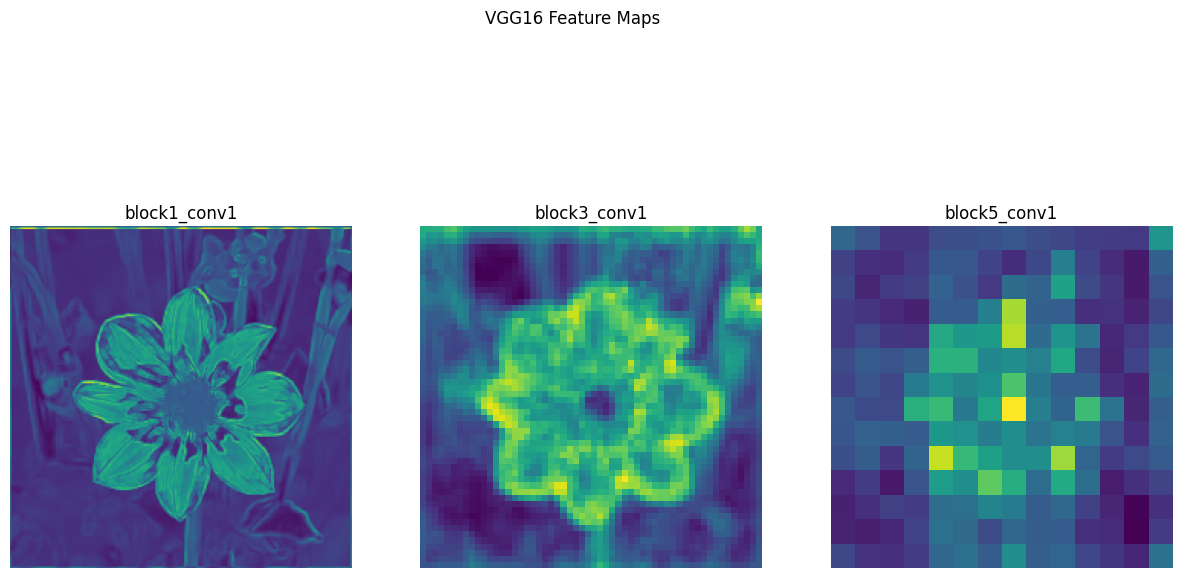

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


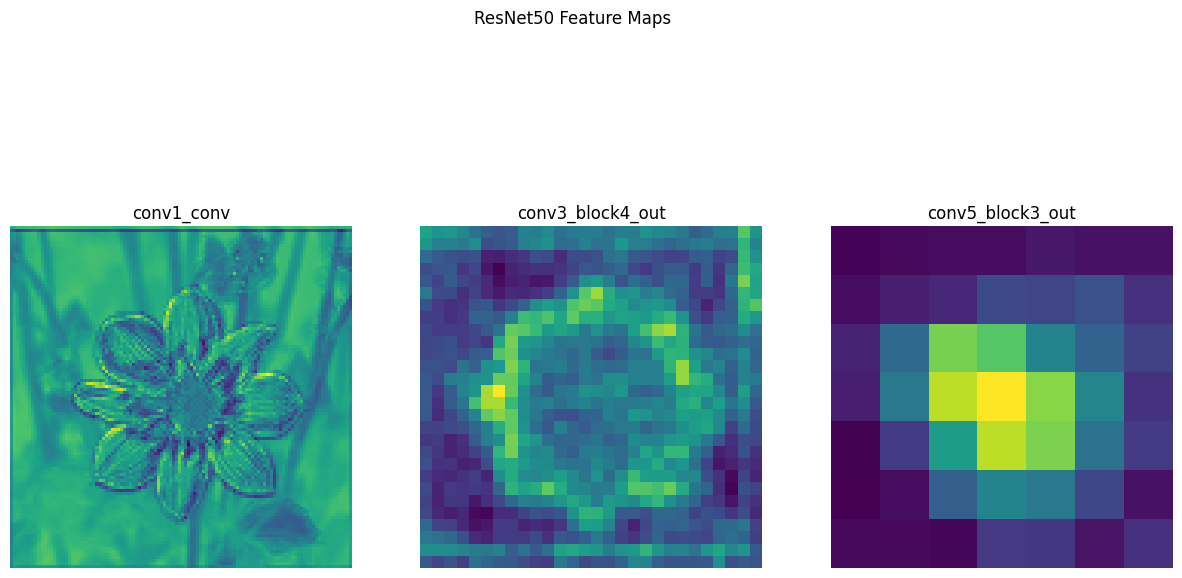

/tmp/ipython-input-2169708390.py:55: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mob_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


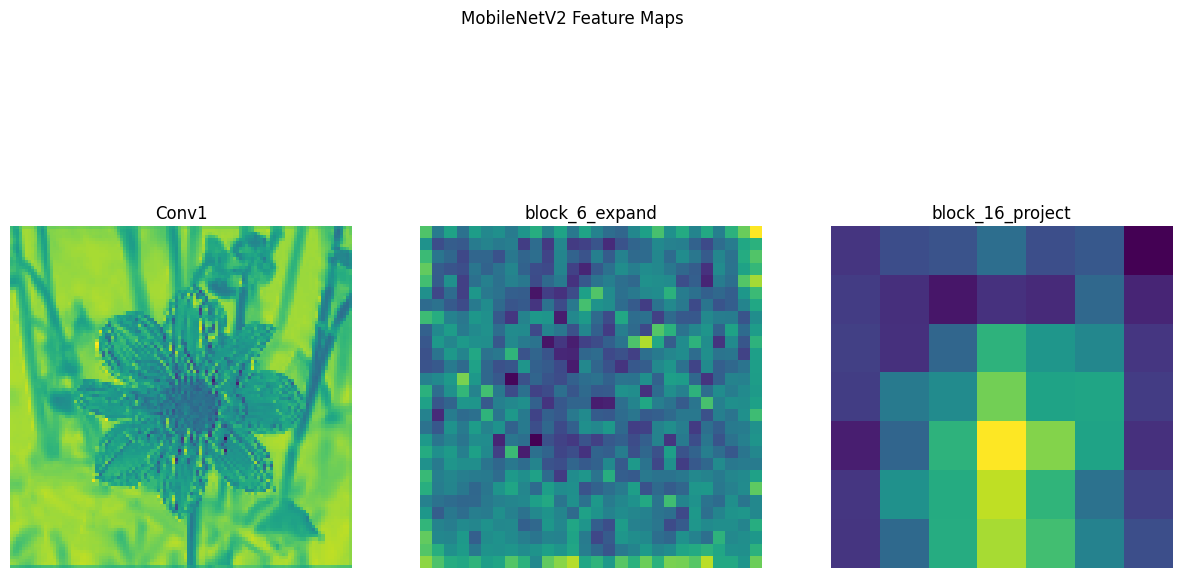

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import vgg16, resnet50, mobilenet_v2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model


# -------- IMAGE LOAD --------
def load_img(img_path, size=(224,224)):
    img = image.load_img(img_path, target_size=size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


# -------- VISUALIZE FEATURE MAPS --------
def visualize_feature_maps(model, img_array, preprocess_fn, layer_names, title):

    img = preprocess_fn(img_array.copy())

    outputs = [model.get_layer(name).output for name in layer_names]
    feature_model = Model(inputs=model.input, outputs=outputs)

    feature_maps = feature_model.predict(img)

    plt.figure(figsize=(15,8))
    plt.suptitle(title)

    for i, fmap in enumerate(feature_maps):
        fmap = fmap[0]
        plt.subplot(1, len(feature_maps), i+1)
        plt.imshow(np.mean(fmap, axis=-1), cmap='viridis')
        plt.title(layer_names[i])
        plt.axis('off')

    plt.show()


# -------- MAIN --------
img_path = "dhalia.png"
img_array = load_img(img_path)

# ---- VGG16 ----
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)
vgg_layers = ['block1_conv1', 'block3_conv1', 'block5_conv1']
visualize_feature_maps(vgg_model, img_array, vgg16.preprocess_input, vgg_layers, "VGG16 Feature Maps")

# ---- ResNet50 ----
res_model = resnet50.ResNet50(weights='imagenet', include_top=False)
res_layers = ['conv1_conv', 'conv3_block4_out', 'conv5_block3_out']
visualize_feature_maps(res_model, img_array, resnet50.preprocess_input, res_layers, "ResNet50 Feature Maps")

# ---- MobileNetV2 ----
mob_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False)
mob_layers = ['Conv1', 'block_6_expand', 'block_16_project']
visualize_feature_maps(mob_model, img_array, mobilenet_v2.preprocess_input, mob_layers, "MobileNetV2 Feature Maps")